In [302]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# <center> Автоматический вариант

## <center> 1. Подготовка таблиц и их сохранение в нормальном формате

In [295]:
# путь к папке, где лежат сырые БД
data_path = 'd:\\documents\\1_projects\\DATA SCIENCE\\IDE\\GreenDesign\\data_invent'

# цикл прохода по каждому из файлов
for file_name in os.listdir(data_path):
    # проверка на формат
    
    if file_name[-5:] == '.xlsx':
        print(f'Открываем файл {file_name}')
        
        # путь к файлу, чтобы панды прочитали эксель
        file_path = 'data_invent/' + file_name
        
        # прочитали эксель по заданному пути
        df = pd.read_excel(file_path, skiprows=2, converters={'Номер ИЗАВ по ПДВ':str})
        
        # тут происходит корректировка столбцов
        # по причине записи названий столбцов в 2 строки
        for i in df.columns:
            # если тип второй строки str
            if type(df.iloc[0][i]) == str:
                # и если сама колонка с именем
                if 'Unnamed' not in i:
                    # создаем временную переменную, которая содержит в себе название
                    # широкого (объединенного) столбца (самой текущей колонки)
                    current_name = i.strip()
                # получаем новое имя, складывая названия из двух строк
                new_name = current_name + ' (' + df.iloc[0][i].strip() + ')'
                # переименовываем столбцы с учетом второй строки
                df = df.rename(columns={i: new_name})
                
                
        # удаляем нулевую строку и сбрасываем индексы
        df = df.drop(axis=0, index=0).reset_index(drop=True)
        
        # удалили все столбцы с названием unnamed (на этот момент это должен быть только 3 столбец)
        for i in df.columns:
            if 'Unnamed' in i:
                df = df.drop([i], axis=1)
                
        # удалим столбец с нумерацией (так как у нас есть своя)
        df = df.drop(['№'], axis=1)
        
        # заполняем пропуски в некоторых столбцах
        df[['Наименование ОГ',\
            'Наименование площадки',\
            'Субъект РФ',\
            'Объект предприятия',\
            'Оборудование/ процесс с выделением ПГ',\
            'Номер ИЗАВ по ПДВ',\
            'Тип ИЗАВ (организованный/неорганизованный)'
        ]] = df[['Наименование ОГ',\
            'Наименование площадки',\
            'Субъект РФ',\
            'Объект предприятия',\
            'Оборудование/ процесс с выделением ПГ',\
            'Номер ИЗАВ по ПДВ',
            'Тип ИЗАВ (организованный/неорганизованный)'
        ]].fillna(method='ffill')
        
        # сохраняем файл в новую папку
        new_file_path = 'data_invent/modif/'  + file_name
        print(f'Запись файла {file_name}, размер таблицы {df.shape}')
        print()
        df.to_excel(new_file_path)

Открываем файл База данных АО АНПЗ ВНК.xlsx
Запись файла База данных АО АНПЗ ВНК.xlsx, размер таблицы (23, 71)



d:\Users\dolzh\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Открываем файл База данных НК НПЗ.xlsx
Запись файла База данных НК НПЗ.xlsx, размер таблицы (77, 71)

Открываем файл База данных ННК.xlsx
Запись файла База данных ННК.xlsx, размер таблицы (19, 71)

Открываем файл База данных по инвентаризации ПГ - Отрадненский ГПЗ.xlsx
Запись файла База данных по инвентаризации ПГ - Отрадненский ГПЗ.xlsx, размер таблицы (75, 72)

Открываем файл База данных по инвентаризации ПГ - Туймазинское ГПП.xlsx
Запись файла База данных по инвентаризации ПГ - Туймазинское ГПП.xlsx, размер таблицы (35, 71)

Открываем файл База данных по инвентаризации ПГ - Шкаповское ГПП.xlsx
Запись файла База данных по инвентаризации ПГ - Шкаповское ГПП.xlsx, размер таблицы (25, 72)



## <center> 2. Конкатенация таблиц в результирующий файл

In [296]:
data_path = 'd:\\documents\\1_projects\\DATA SCIENCE\\IDE\\GreenDesign\\data_invent\\modif'

# задаем результирующий датафрейм
result = pd.DataFrame()

for file_name in os.listdir(data_path):
    # создаем словарь с датафреймами
    
    
    # проверка на то, чтобы это был не Result
    if file_name[:6] != 'result':
        
        # имя в соответсвии с каунтом
        # name = 'df' + str(count)
        
        print(f'Записываем в переменную файл {file_name}')
        file_path = 'data_invent/modif/' + file_name
        df = pd.read_excel(file_path)
        df = df.drop(['Unnamed: 0'], axis=1)
        result = pd.concat([result, df], ignore_index=True)
       
result.to_excel('data_invent/modif/result.xlsx')

Записываем в переменную файл База данных АО АНПЗ ВНК.xlsx
Записываем в переменную файл База данных НК НПЗ.xlsx
Записываем в переменную файл База данных ННК.xlsx
Записываем в переменную файл База данных по инвентаризации ПГ - Отрадненский ГПЗ.xlsx
Записываем в переменную файл База данных по инвентаризации ПГ - Туймазинское ГПП.xlsx
Записываем в переменную файл База данных по инвентаризации ПГ - Шкаповское ГПП.xlsx


# <center> Ручной вариант

In [283]:
df = pd.read_excel('data_invent/База данных по инвентаризации ПГ - Туймазинское ГПП.xlsx', skiprows=2)
# converters={'Номер ИЗАВ по ПДВ':str}

d:\Users\dolzh\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [284]:
for i in df.columns:
    if type(df.iloc[0][i]) == str:
        if 'Unnamed' not in i:
            # создаем временную переменную, которая содержит в себе название
            # широкого столбца
            current_name = i.strip()
        new_name = current_name + ' (' + df.iloc[0][i].strip() + ')'
        # переименовываем столбцы с учетом второй строки
        df = df.rename(columns={i: new_name})
            

In [285]:
# удаляем нулевую строку и сбрасываем индексы
df = df.drop(axis=0, index=0).reset_index(drop=True)

In [286]:
# удалили все столбцы с названием unnamed
for i in df.columns:
    if 'Unnamed' in i:
        df = df.drop([i], axis=1)

In [287]:
# удалим столбец с номером
df = df.drop(['№'], axis=1)

In [ ]:
# заполняем пропуски
df[['Наименование ОГ',\
    'Наименование площадки',\
    'Субъект РФ',\
    'Объект предприятия',\
    'Оборудование/ процесс с выделением ПГ',\
    'Номер ИЗАВ по ПДВ',\
    'Тип ИЗАВ (организованный/неорганизованный)'
    ]] = df[['Наименование ОГ',\
    'Наименование площадки',\
    'Субъект РФ',\
    'Объект предприятия',\
    'Оборудование/ процесс с выделением ПГ',\
    'Номер ИЗАВ по ПДВ',
    'Тип ИЗАВ (организованный/неорганизованный)'
    ]].fillna(method='ffill')

In [293]:
df.to_excel('data_invent/База данных по инвентаризации ПГ - Туймазинское ГПП_new.xlsx')

## <center> Работа с пропусками в Result

In [312]:
df = pd.read_excel('data_invent/modif/result.xlsx', index_col='Unnamed: 0')

In [313]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
cols_with_null

Месторождение (для добычи)                                                            100.000000
23 Выбросы от управления СВ (БОСы) (Выбросы СН4, т/год)                               100.000000
4. Нефтепереработка (Выбросы СО2, т/год)                                              100.000000
12. Нефтехимическое производство (Выбросы СО2, т/год)                                 100.000000
5. Производство кокса (Выбросы СО2, т/год)                                            100.000000
                                                                                         ...    
3. Фугитивные выбросы (Выброс ПГ с учётом ПГП, тонн СО2-экв/год)                       55.118110
12. Нефтехимическое производство (Выброс ПГ с учётом ПГП, тонн СО2-экв/год)            55.118110
20 Автомобильный транспорт (на балансе) (Выброс ПГ с учётом ПГП, тонн СО2-экв/год)     54.724409
Наименование площадки                                                                  31.102362
Объект предприятия            

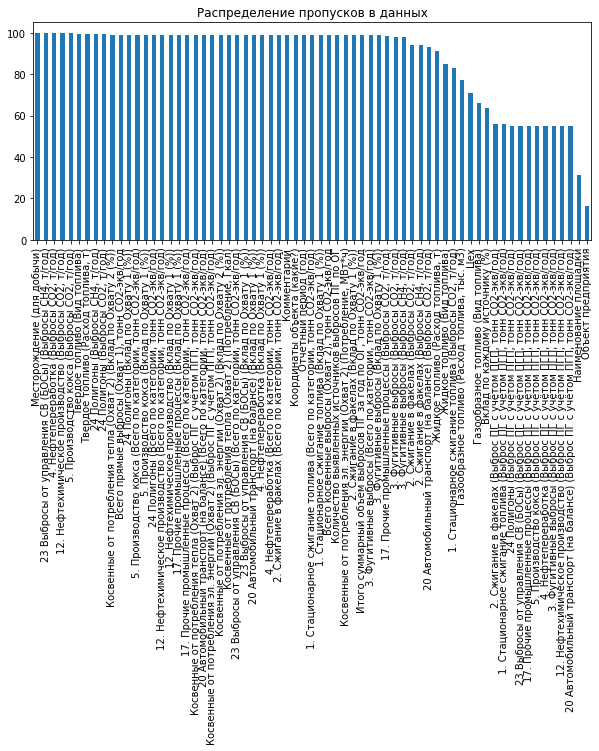

In [314]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

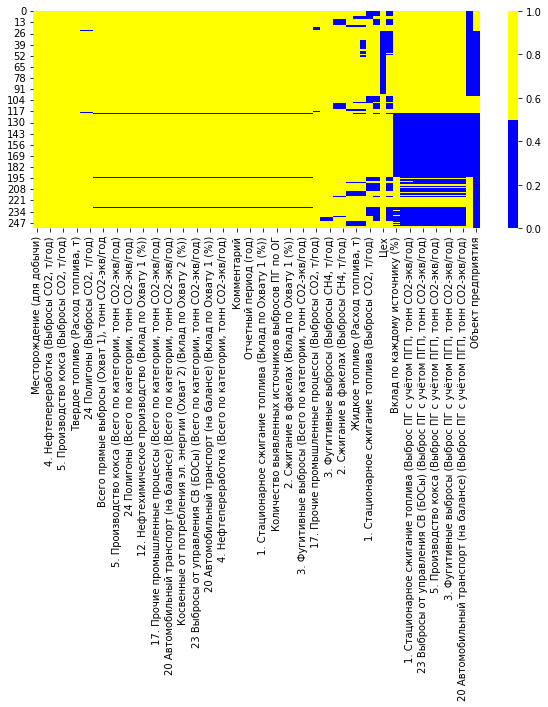

In [315]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [316]:
#создаем копию исходной таблицы
drop_data = df.copy()
#задаем минимальный порог: вычисляем 30% от числа строк
thresh = drop_data.shape[0]*0.3
#удаляем столбцы, в которых более 70% пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск

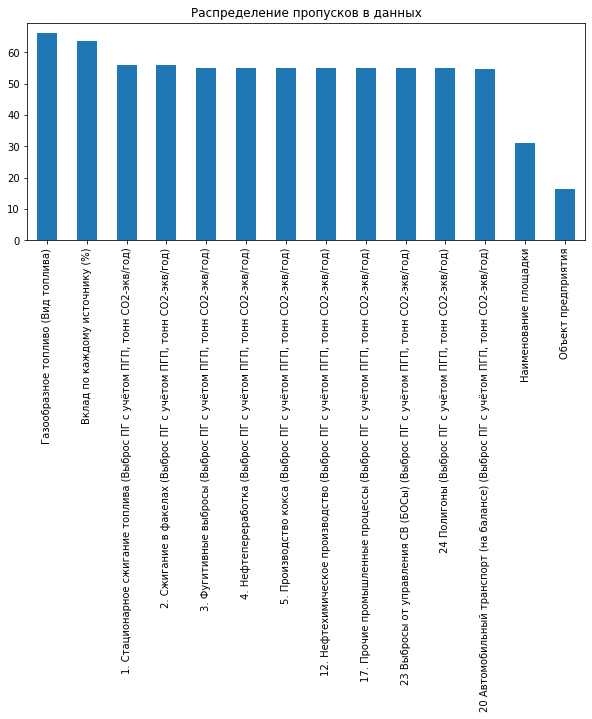

In [318]:
cols_null_percent = drop_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

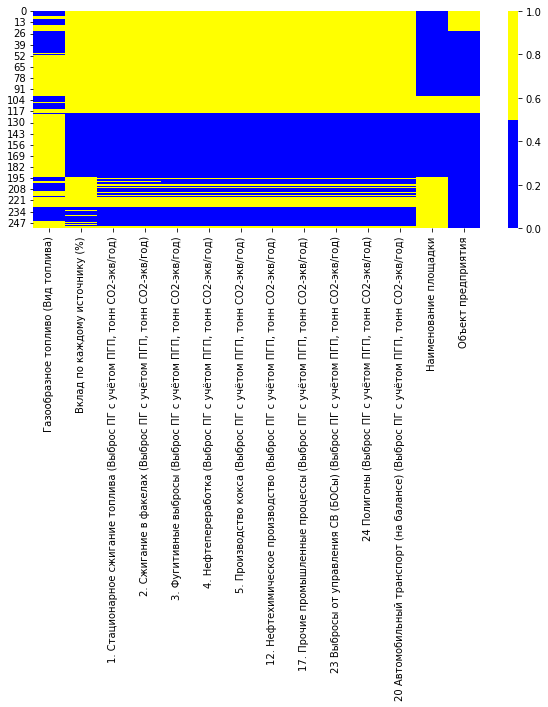

In [320]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    drop_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)